In [1]:
def is_pf(n):
    if n <= 1:
        return False
    if n == 2:
        return True
    if n % 2 == 0:
        return False
    for i in range(3, int(math.sqrt(n)) + 1, 2):
        if n % i == 0:
            return False
    return True


In [ ]:
!pip install matplotlib

In [9]:
import multiprocessing
import time
import math
import matplotlib.pyplot as plt

In [3]:
def find_mp(s, e):
    return max(filter(lambda x: is_pf(x), range(s, e)), default=None)

def mp_in_ran(n):
    mid = n // 2
    with multiprocessing.Pool(2) as pool:
        res = pool.starmap(find_mp, [(2, mid + 1), (mid + 1, n + 1)])
    return max(res)


In [5]:
inp = [10000, 20000, 30000, 40000, 50000]  
ress = []

for n in inp:
    st = time.time()
    max_p = mp_in_ran(n)
    et = time.time() - st
    ress.append((n, max_p, et))
    print(f"N = {n}, Max Prime = {max_p}, Time = {et:.2f} seconds")


N = 10000, Max Prime = 9973, Time = 0.01 seconds
N = 20000, Max Prime = 19997, Time = 0.02 seconds
N = 30000, Max Prime = 29989, Time = 0.02 seconds
N = 40000, Max Prime = 39989, Time = 0.02 seconds
N = 50000, Max Prime = 49999, Time = 0.03 seconds


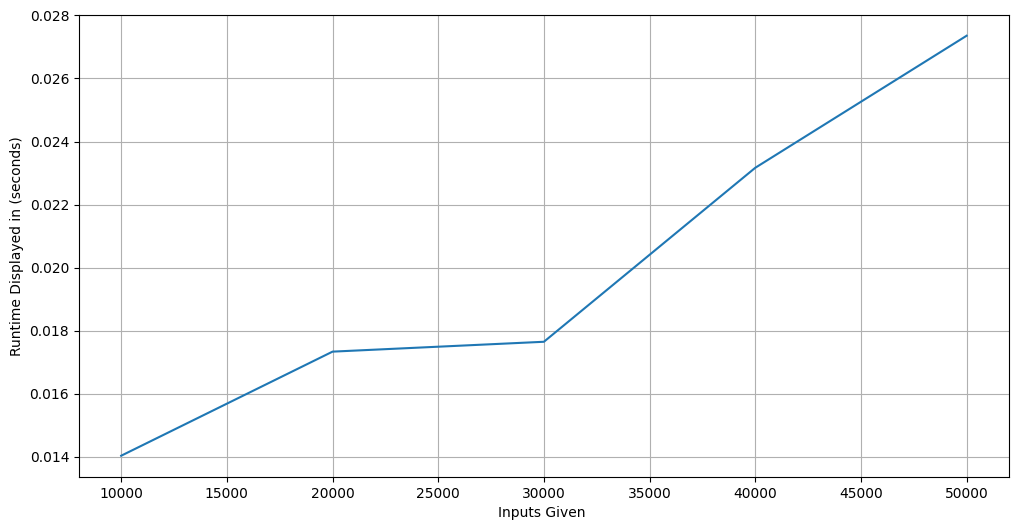

In [12]:


inp_plot = [i[0] for i in ress]
ts_plot = [j[2] for j in ress]

plt.figure(figsize=(12, 6))
plt.plot(inp_plot, ts_plot)
plt.xlabel('Inputs Given ')
plt.ylabel('Runtime Displayed in (seconds)')
plt.grid(True)
plt.show()


#### The is_pf function removes non-prime candidates by returning False for numbers less than 2, and special-casing 2 as a prime.
#### Following a two-fold divisibility check, the loop increases by two, effectively ignoring all even numbers and concentrating only on odd numbers, which makes the loop completion even more faster.